In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [7]:
# 1. Load Dataset

file_path = "E:/sytecxhub_project4/sales_data (2).csv"

try:
    df = pd.read_csv(file_path)
    print("Dataset Loaded Successfully ✅\n")
except FileNotFoundError:
    print("❌ File not found. Check the path.")
    raise

print("First 5 Rows:")
display(df.head())

print("\nColumns in Dataset:")
print(df.columns)


Dataset Loaded Successfully ✅

First 5 Rows:


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie



Columns in Dataset:
Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')


In [11]:
# 2. Data Cleaning
# ----------------------------

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Convert Sale_Date to datetime 
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

# Create Revenue column
df['Revenue'] = df['Quantity_Sold'] * df['Unit_Price']

print("\nData Cleaning Completed ✅")



Data Cleaning Completed ✅


In [13]:
# 3. KPI Calculations
# ----------------------------

total_revenue = df['Revenue'].sum()
total_orders = df['Product_ID'].nunique()
avg_order_value = total_revenue / total_orders

print("\n===== KEY KPIs =====")
print(f"Total Revenue: {round(total_revenue,2)}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: {round(avg_order_value,2)}")



===== KEY KPIs =====
Total Revenue: 70329940.71
Total Orders: 100
Average Order Value: 703299.41


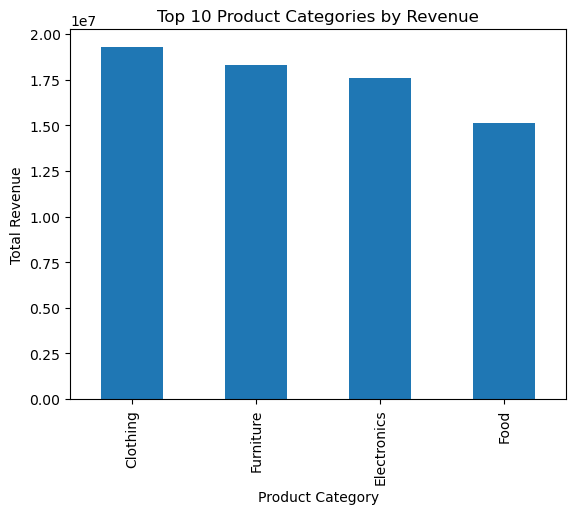

In [20]:
# 4. Top 10 Products

top_categories = (
    df.groupby('Product_Category')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_categories.plot(kind='bar')
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.savefig("revenue_by_category.png", dpi=300, bbox_inches="tight")
plt.show()


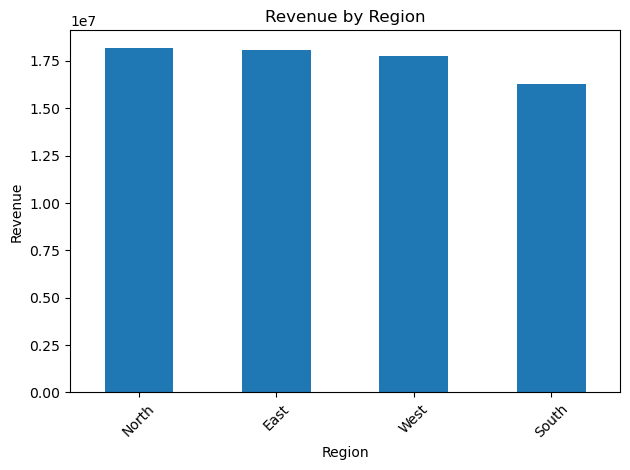

In [19]:
# 5. Revenue by City

city_revenue = (
    df.groupby('Region')['Revenue']
    .sum()
    .sort_values(ascending=False)
)

plt.figure()
city_revenue.plot(kind='bar')
plt.title("Revenue by Region")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("revenue_by_region.png", dpi=300, bbox_inches="tight")
plt.show()


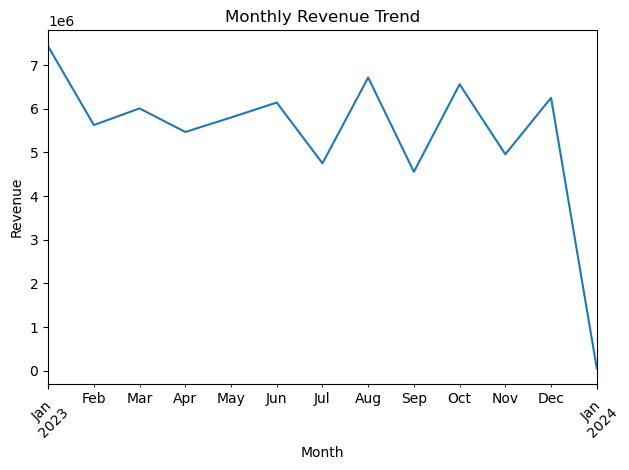

In [24]:
#6. Monthly Revenue Trend (Seasonality)
# ----------------------------

df['Month'] = df['Sale_Date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Revenue'].sum()

plt.figure()
monthly_revenue.plot(kind='line')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(" Monthly Revenue Trend.png", dpi=300, bbox_inches="tight")
plt.show()


In [27]:
# 7. Export Summary Report
# ----------------------------

summary = {
    "Total Revenue": total_revenue,
    "Average Order Value": avg_order_value,
    "top_categories": top_categories.index[0],
    "Top City": city_revenue.index[0]
}

summary_df = pd.DataFrame([summary])
summary_df.to_csv("sales_summary_report.csv", index=False)

print("\nSales Analysis Completed Successfully 🚀")
print("Summary report saved as: sales_summary_report.csv")


Sales Analysis Completed Successfully 🚀
Summary report saved as: sales_summary_report.csv
